## **Problem Statement:**<br>
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.<br>

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.<br>

# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('bigdatamart_Train.csv')
test = pd.read_csv('bigdatamart_Test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Let's examine the train and test data.

In [5]:
train.shape

(8523, 12)

Training data has **8523 rows** and **12 columns** with **"Item_Outlet_Sales"** as target column/feature.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type are object types. <br>
Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales(target column) are float type.<br>
Outlet_Establishment_Year is in int data type.<br>

There are **null values in Item_Weight and Outlet_Size columns**.

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Testing data has **5682 rows** and **11 columns**.<br>
There are null values in Item_Weight and Outlet_Size columns (1606 rows).<br>

The data types are same as training data.

Outlet_Establishment_Year is in Int data type. However, this may be not be helpful as the year column serves as a category in this problem statement.

## Looking at each column of Training data.

In [8]:
pd.set_option('display.max_rows', 500)

In [9]:
train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDX20     9
FDV38     9
NCJ30     9
         ..
FDQ60     1
FDE52     1
DRF48     1
FDC23     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

So out of 8523 items, 1559 items (As described in problem statement) has multiple re-entries. We will look if we can use this column to treat missing values.

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

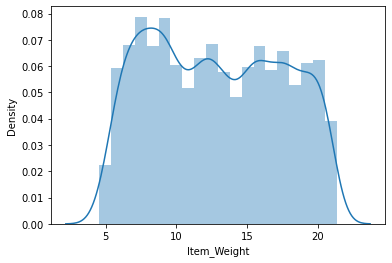

In [10]:
sns.distplot(train['Item_Weight'])

In [11]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

There are missing values and  the weight's of the products range from 4.55 - 21.35.

<AxesSubplot:xlabel='Item_Weight'>

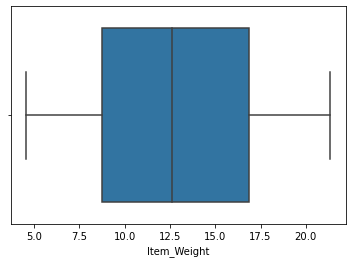

In [12]:
sns.boxplot(train['Item_Weight'])

All good with this column, apart from missing values and skewness.

In [13]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Items are categories into 5 categories respectively. Clearly, Low fat category has more products. Lets look at the sales and this category distribution.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

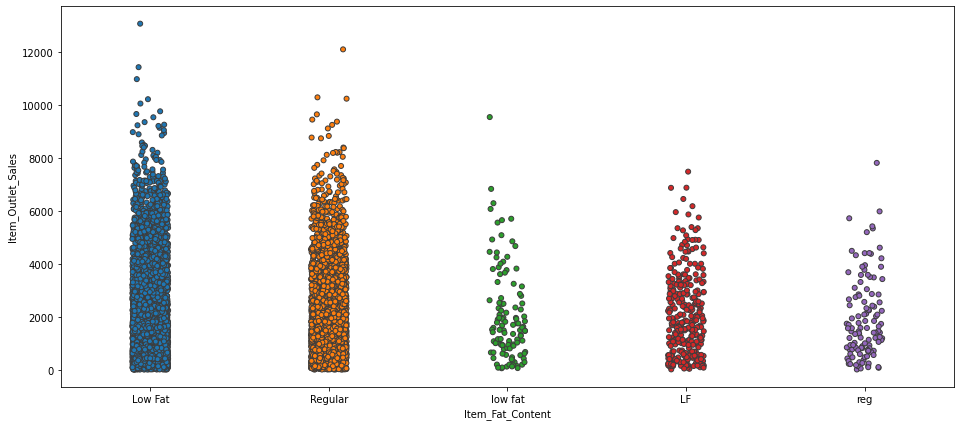

In [14]:
plt.figure(figsize=(16,7))
sns.stripplot(train['Item_Fat_Content'], train['Item_Outlet_Sales'], linewidth=1)

**Low Fat** have more products and more sales, then **Regular**, **low fat**, **LF** and **reg**.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

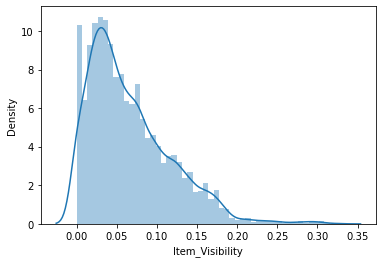

In [15]:
sns.distplot(train['Item_Visibility'])

In [16]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [17]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

There are 16 type if types of products and more products are "Fruits and Vegetables", "Snack Foods" and "Household".

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

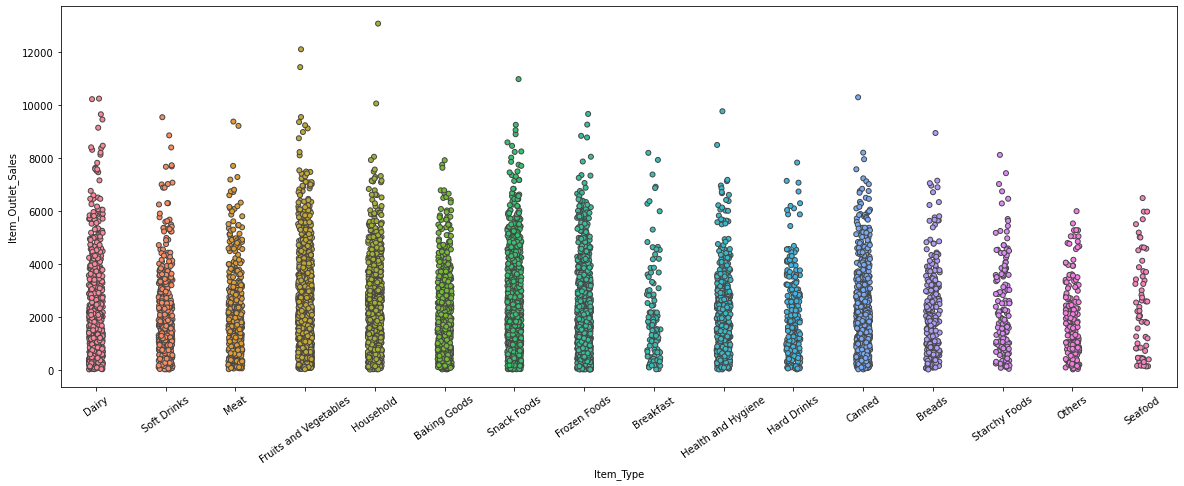

In [18]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=35)
sns.stripplot(train['Item_Type'],train['Item_Outlet_Sales'], linewidth=1 )

This shows that all the item types vere sold comparetively equally. We would need to concentrate on aspects (Like size, type of store etc..) which has more sales

In [19]:
train.groupby("Item_Type")["Item_Outlet_Sales"].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

This supports our assumption(all the items are sold comparetively equally). All the items have a mean around 1900 and 2300 sales.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

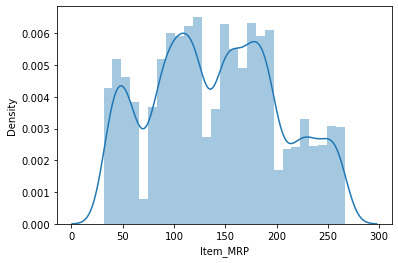

In [20]:
sns.distplot(train['Item_MRP'])

In [21]:
train['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

This column is highly skewed and price ranges from 31.29 - 266.89. 

<AxesSubplot:xlabel='Item_Type', ylabel='Item_MRP'>

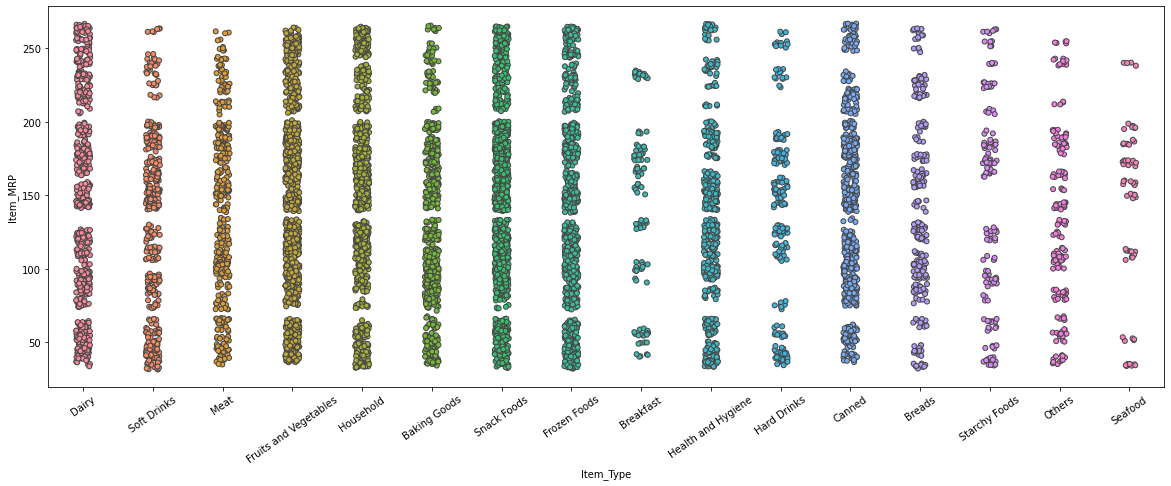

In [22]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=35)
sns.stripplot(train['Item_Type'],train['Item_MRP'], linewidth=1 )

All type of foods have wide price range.

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

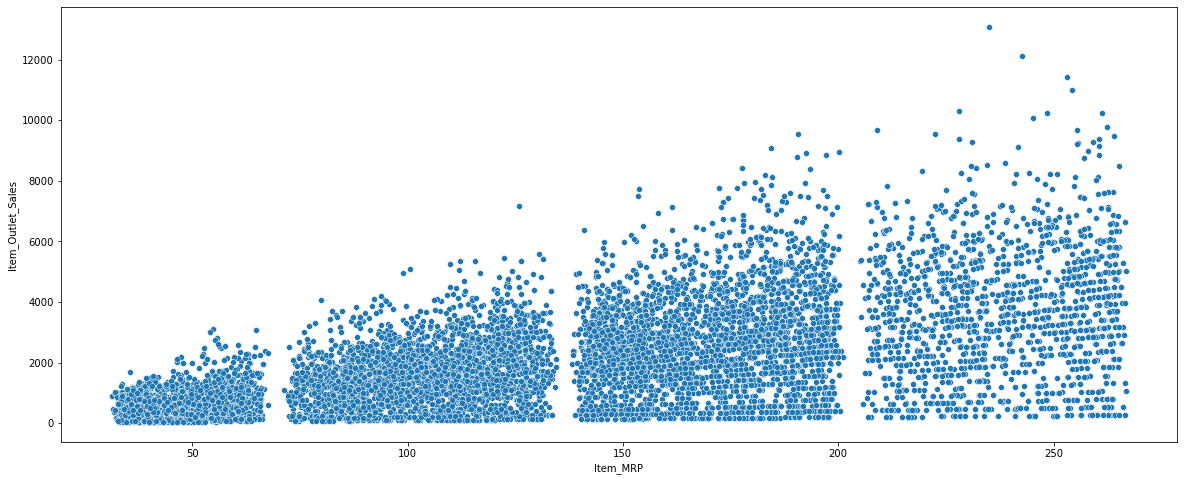

In [23]:
plt.figure(figsize=(20,8))
sns.scatterplot(train['Item_MRP'], train['Item_Outlet_Sales'])

This shows that there are Low sales for low price items. That means even if the price is low, we cannot expect more sales.

In [24]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

There are 10 Outlet Identifiers. Lets look at this feature.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

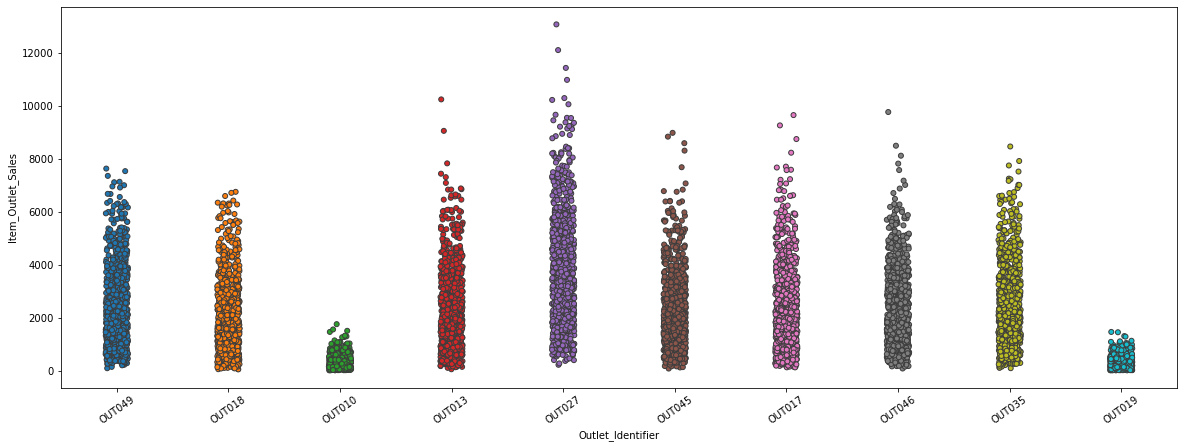

In [25]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=35)
sns.stripplot(train['Outlet_Identifier'],train['Item_Outlet_Sales'], linewidth=1 )

This has a good effect on sales. There are very low sales from outlets- OUT010 and OUT019. More sales with OUT027. All the other categories or outlets have relatively similar sales report.

In [26]:
train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean()

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

This command gives the mean values of sales with Outlets. OUT010 and OUT019 show low sales.

In [27]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [28]:
train.groupby('Outlet_Establishment_Year')['Outlet_Identifier'].value_counts()

Outlet_Establishment_Year  Outlet_Identifier
1985                       OUT027               935
                           OUT019               528
1987                       OUT013               932
1997                       OUT046               930
1998                       OUT010               555
1999                       OUT049               930
2002                       OUT045               929
2004                       OUT035               930
2007                       OUT017               926
2009                       OUT018               928
Name: Outlet_Identifier, dtype: int64

We know that OUT019 and OUT010 have low sales. 1985 and 1998 Establishment Year has these two outlets belonging too.<br>

In [29]:
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()

Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

1998 establishment year outlet OUT010 has lowest sales. 1985 year has two outlets OUT027 and OUT019, hence its sales are similar to other years.

In [30]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [31]:
train.groupby('Outlet_Size')['Outlet_Identifier'].value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64

Clearly Outlet_Size has missing values. Outlet_Identifier and Outlet_Size doesn't show effect to Item_Outlet_Sales.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

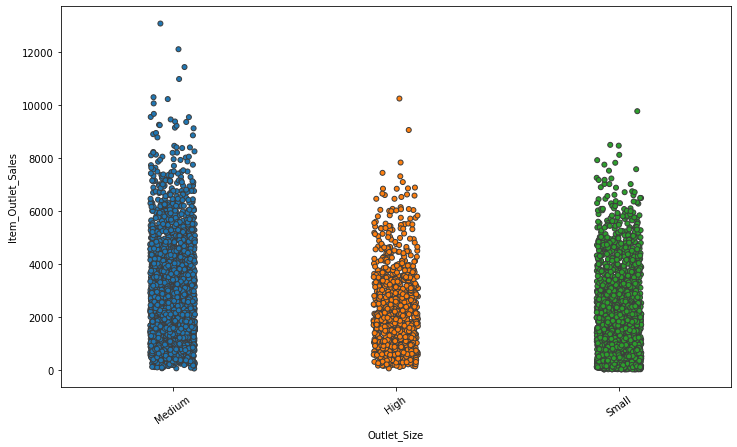

In [32]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=35)
sns.stripplot(train['Outlet_Size'],train['Item_Outlet_Sales'], linewidth=1 )

Medium size has more sales than High and Small outlet_size. Small outlet size seem having more sales than High outlet size.<br> 

In [33]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

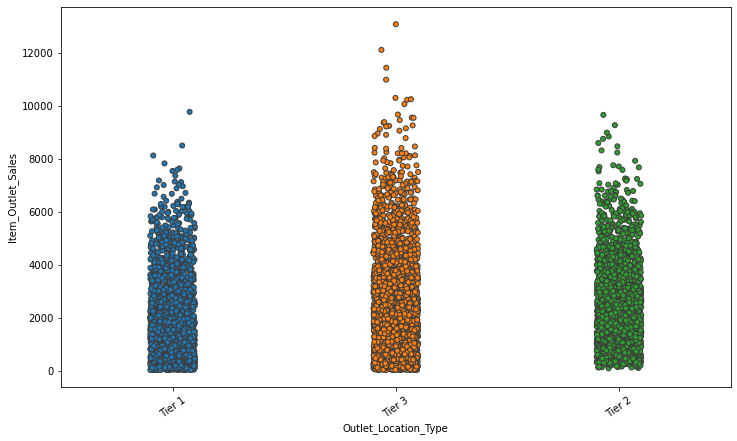

In [34]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=35)
sns.stripplot(train['Outlet_Location_Type'],train['Item_Outlet_Sales'], linewidth=1 )

Tier 3 has more sales. Lets its relation with outlet size.

In [35]:
train.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1863
                      High            932
Name: Outlet_Size, dtype: int64

This might help us deal with missing values. We will take the establishment year, Item_Identifier as well in consideration.

In [36]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

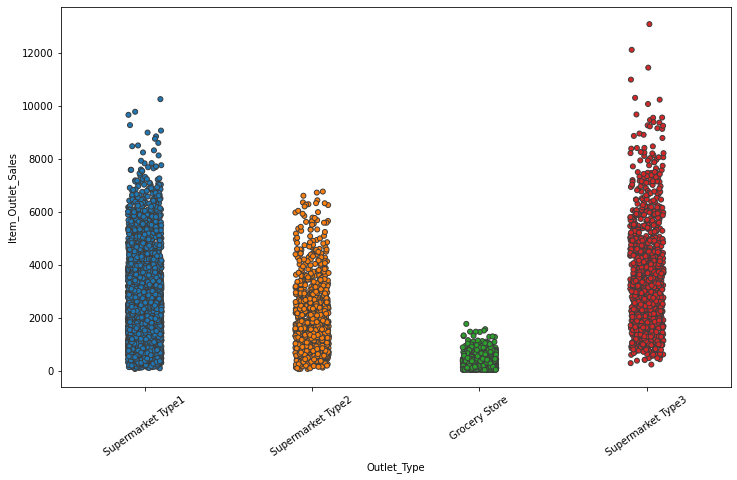

In [37]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=35)
sns.stripplot(train['Outlet_Type'],train['Item_Outlet_Sales'], linewidth=1 )

Clearly Grocery Store has low sales. Supermarket Type 2 has low sales.

In [38]:
train.groupby('Outlet_Type')['Item_Type'].value_counts()

Outlet_Type        Item_Type            
Grocery Store      Fruits and Vegetables    152
                   Snack Foods              146
                   Household                119
                   Frozen Foods             103
                   Dairy                     92
                   Baking Goods              85
                   Canned                    73
                   Health and Hygiene        67
                   Meat                      66
                   Soft Drinks               54
                   Breads                    33
                   Others                    27
                   Hard Drinks               24
                   Breakfast                 19
                   Starchy Foods             13
                   Seafood                   10
Supermarket Type1  Fruits and Vegetables    805
                   Snack Foods              785
                   Household                597
                   Frozen Foods             572

So the sales seems to be directly dependent on Item_Fat_Content, Item_Type, Item_MRP(more the price more the sales), Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type. 

We got a good look at the data. Correlation would not help here as most of the data is categorical.

# Treating missing /values.

In [39]:
train[train['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [40]:
train[train['Outlet_Size'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [41]:
test[test['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
12,NCC54,NaN,Low Fat,0.171079,Health and Hygiene,240.4196,OUT019,1985,Small,Tier 1,Grocery Store
18,NCM42,NaN,Low Fat,0.028184,Household,109.6912,OUT027,1985,Medium,Tier 3,Supermarket Type3
23,NCL19,NaN,Low Fat,0.027447,Others,142.3470,OUT019,1985,Small,Tier 1,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
5655,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3
5656,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3
5661,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3
5665,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [42]:
test[test['Outlet_Size'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5668,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store
5670,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


Item_Weight is a continuouls column and Outlet_Size is a categorical column. We cannot use mean, median or frequent on this data set as the there are multiple columns which shows good signs of influence on each other. That would be a Blunder. We will use KNNImputer to deal with continuos variable, will impute categorical values using KNNImputer and by creating a model.

In [43]:
train1 = train.copy()
train2 = train.copy()
train3= train.copy()
train4= train.copy()

In [44]:
test1 = test.copy()
test2 = test.copy()
test3= test.copy()
test4= test.copy()

In [45]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

In [46]:
train1['Item_Weight'] = imputer.fit_transform(train1['Item_Weight'].values.reshape(-1,1))
train2['Item_Weight'] = imputer.fit_transform(train2['Item_Weight'].values.reshape(-1,1))

In [47]:
test1['Item_Weight'] = imputer.fit_transform(test1['Item_Weight'].values.reshape(-1,1))
test2['Item_Weight'] = imputer.fit_transform(test2['Item_Weight'].values.reshape(-1,1))

In [48]:
train1.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

let's create x and y variables with outlet size in x and missing values in y

In [49]:
xtrain_outlet = train1.dropna()
ytrain_outlet = train1[train1['Outlet_Size'].isna()]

In [50]:
xtrain_outlet

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [51]:
ytrain_outlet

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [52]:
ytrain_outlet_final = ytrain_outlet.drop('Outlet_Size', axis=1)

In [53]:
xtrain_outlet.shape

(6113, 12)

In [54]:
ytrain_outlet_final.shape

(2410, 11)

**Same with test data set.**

In [55]:
xtest_outlet = test1.dropna()
ytest_outlet = test1[test1['Outlet_Size'].isna()]

In [56]:
xtest_outlet

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,12.695633,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5673,FDF46,7.070000,Low Fat,0.094053,Snack Foods,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2
5674,DRL35,15.700000,Low Fat,0.030704,Hard Drinks,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1
5675,FDW46,13.000000,Regular,0.070411,Snack Foods,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1


In [57]:
ytest_outlet

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5668,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store
5670,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [58]:
ytest_outlet_final = ytest_outlet.drop('Outlet_Size', axis=1)

In [59]:
xtest_outlet.shape

(4075, 11)

In [60]:
ytest_outlet_final.shape

(1606, 10)

All right lets build a model to predict the Outlet_Size for both training and test model.

xtrain_outlet , ytrain_outlet_final  are the data sets for training data set. let's encode them.

In [61]:
list1 =['Item_Identifier', 'Item_Fat_Content','Item_Type', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']

list2 =['Item_Identifier', 'Item_Fat_Content','Item_Type', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Location_Type','Outlet_Type']

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

for columns in list1:
    xtrain_outlet[columns] = le.fit_transform(xtrain_outlet[columns])

for columns in list2:
    ytrain_outlet_final[columns] = le.fit_transform(ytrain_outlet_final[columns])

In [62]:
xtrain_1 = xtrain_outlet.drop('Outlet_Size', axis=1)
ytrain_1 = xtrain_outlet['Outlet_Size']

In [63]:
xtrain_1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,155,9.300,1,0.016047,4,249.8092,6,3,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,1,5,2,2,443.4228
2,661,17.500,1,0.016760,10,141.6180,6,3,0,1,2097.2700
4,1294,8.930,1,0.000000,9,53.8614,0,1,2,1,994.7052
5,757,10.395,2,0.000000,0,51.4008,1,5,2,2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...
8517,388,20.750,4,0.083607,5,178.8318,5,2,0,1,3608.6360
8518,369,6.865,1,0.056783,13,214.5218,0,1,2,1,2778.3834
8520,1354,10.600,1,0.035186,8,85.1224,4,4,1,1,1193.1136
8521,680,7.210,2,0.145221,13,103.1332,1,5,2,2,1845.5976


In [64]:
ytrain_1

0       1
1       1
2       1
4       0
5       1
       ..
8517    2
8518    0
8520    2
8521    1
8522    2
Name: Outlet_Size, Length: 6113, dtype: int32

## Creating a model to predict the missing values for Outlet_Size using train1 data.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## For Training data

In [67]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(xtrain_1,ytrain_1,test_size=0.20,random_state=i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 1.0 on random state 0


In [68]:
x_train,x_test,y_train,y_test = train_test_split(xtrain_1,ytrain_1,test_size=0.20,random_state=0)

In [69]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.6868356500408831
[[118  60   5]
 [  2 392 179]
 [  3 134 330]]
              precision    recall  f1-score   support

           0       0.96      0.64      0.77       183
           1       0.67      0.68      0.68       573
           2       0.64      0.71      0.67       467

    accuracy                           0.69      1223
   macro avg       0.76      0.68      0.71      1223
weighted avg       0.70      0.69      0.69      1223



In [70]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 1.0
[[183   0   0]
 [  0 573   0]
 [  0   0 467]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00       573
           2       1.00      1.00      1.00       467

    accuracy                           1.00      1223
   macro avg       1.00      1.00      1.00      1223
weighted avg       1.00      1.00      1.00      1223



In [71]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 1.0
[[183   0   0]
 [  0 573   0]
 [  0   0 467]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00       573
           2       1.00      1.00      1.00       467

    accuracy                           1.00      1223
   macro avg       1.00      1.00      1.00      1223
weighted avg       1.00      1.00      1.00      1223



In [72]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 1.0
[[183   0   0]
 [  0 573   0]
 [  0   0 467]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00       573
           2       1.00      1.00      1.00       467

    accuracy                           1.00      1223
   macro avg       1.00      1.00      1.00      1223
weighted avg       1.00      1.00      1.00      1223



In [73]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.4578904333605887
[[ 40  99  44]
 [ 92 338 143]
 [ 55 230 182]]
              precision    recall  f1-score   support

           0       0.21      0.22      0.22       183
           1       0.51      0.59      0.55       573
           2       0.49      0.39      0.44       467

    accuracy                           0.46      1223
   macro avg       0.40      0.40      0.40      1223
weighted avg       0.46      0.46      0.45      1223



Clearly tree classifiers have good accuracy. Let's cross validate to be sure.

## Crossvalidation.

In [74]:
from sklearn.model_selection import cross_val_score
rfc = cross_val_score(rf, xtrain_1, ytrain_1, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 1.0


In [75]:
dtc = cross_val_score(dt, xtrain_1, ytrain_1, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 1.0


All good lets use randomforest to predict the values.

In [76]:
rf = RandomForestClassifier()
rf.fit(xtrain_1,ytrain_1)
pred = rf.predict(ytrain_outlet_final)

In [77]:
pred

array([2, 2, 2, ..., 2, 2, 2])

Lets add this column to ytrain_outlet_final and join the resultant ytrain_outlet_final and xtrain_outlet. This will give us the training model with imputed Outlet_Size (which is also encoded).

In [78]:
ytrain_outlet_final['Outlet_Size'] = pred

In [79]:
ytrain_outlet_final

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size
3,991,19.200,2,0.000000,6,182.0950,0,0,1,0,732.3800,2
8,389,16.200,2,0.016687,5,96.9726,2,1,0,1,1076.5986,2
9,882,19.200,2,0.094450,5,187.8214,1,2,0,1,4710.5350,2
25,1149,13.000,1,0.099887,9,45.9060,1,2,0,1,838.9080,2
28,308,5.925,2,0.161467,4,45.5086,0,0,1,0,178.4344,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,1191,8.420,1,0.070712,9,216.4192,2,1,0,1,3020.0688,2
8508,964,11.350,2,0.043246,6,199.4742,2,1,0,1,2587.9646,2
8509,372,8.100,1,0.214306,6,213.9902,0,0,1,0,424.7804,2
8514,131,15.000,2,0.054489,3,57.5904,2,1,0,1,468.7232,2


In [80]:
ytrain_outlet_final.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Size                  0
dtype: int64

In [81]:
ytrain_outlet_final['Outlet_Size'].unique()

array([2, 0])

In [82]:
training = xtrain_outlet.append(ytrain_outlet_final)

In [83]:
training

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,155,9.300,1,0.016047,4,249.8092,6,3,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,1,5,1,2,2,443.4228
2,661,17.500,1,0.016760,10,141.6180,6,3,1,0,1,2097.2700
4,1294,8.930,1,0.000000,9,53.8614,0,1,0,2,1,994.7052
5,757,10.395,2,0.000000,0,51.4008,1,5,1,2,2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,1191,8.420,1,0.070712,9,216.4192,2,1,2,0,1,3020.0688
8508,964,11.350,2,0.043246,6,199.4742,2,1,2,0,1,2587.9646
8509,372,8.100,1,0.214306,6,213.9902,0,0,2,1,0,424.7804
8514,131,15.000,2,0.054489,3,57.5904,2,1,2,0,1,468.7232


All done with training data. Let's follow the same with testing data set.

**xtest_outlet , ytest_outlet_final are the testing dataset.**

In [84]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

for columns in list1:
    xtest_outlet[columns] = le.fit_transform(xtest_outlet[columns])

for columns in list2:
    ytest_outlet_final[columns] = le.fit_transform(ytest_outlet_final[columns])

In [85]:
xtest_1 = xtest_outlet.drop('Outlet_Size', axis=1)
ytest_1 = xtest_outlet['Outlet_Size']

## For Testing data


In [86]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(xtest_1,ytest_1,test_size=0.20,random_state=i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 1.0 on random state 0


In [87]:
x_train,x_test,y_train,y_test = train_test_split(xtest_1,ytest_1,test_size=0.20,random_state=0)

In [88]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.7631901840490798
[[115   0   0]
 [  0 298  89]
 [  0 104 209]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       0.74      0.77      0.76       387
           2       0.70      0.67      0.68       313

    accuracy                           0.76       815
   macro avg       0.81      0.81      0.81       815
weighted avg       0.76      0.76      0.76       815



In [89]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 1.0
[[115   0   0]
 [  0 387   0]
 [  0   0 313]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       387
           2       1.00      1.00      1.00       313

    accuracy                           1.00       815
   macro avg       1.00      1.00      1.00       815
weighted avg       1.00      1.00      1.00       815



In [90]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 1.0
[[115   0   0]
 [  0 387   0]
 [  0   0 313]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       387
           2       1.00      1.00      1.00       313

    accuracy                           1.00       815
   macro avg       1.00      1.00      1.00       815
weighted avg       1.00      1.00      1.00       815



In [91]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 1.0
[[115   0   0]
 [  0 387   0]
 [  0   0 313]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       387
           2       1.00      1.00      1.00       313

    accuracy                           1.00       815
   macro avg       1.00      1.00      1.00       815
weighted avg       1.00      1.00      1.00       815



In [92]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.37791411042944784
[[ 11  75  29]
 [ 48 212 127]
 [ 22 206  85]]
              precision    recall  f1-score   support

           0       0.14      0.10      0.11       115
           1       0.43      0.55      0.48       387
           2       0.35      0.27      0.31       313

    accuracy                           0.38       815
   macro avg       0.31      0.31      0.30       815
weighted avg       0.36      0.38      0.36       815



Clearly tree based algorithm is the best option, however lets cross validate.

## Crossvalidation

In [93]:
rfc = cross_val_score(rf, xtest_1, ytest_1, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 1.0


In [94]:
dtc = cross_val_score(dt, xtest_1, ytest_1, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 1.0


Let's predict the missing values for testing data

In [95]:
rf = RandomForestClassifier()
rf.fit(xtest_1,ytest_1)
pred2 = rf.predict(ytest_outlet_final)

In [96]:
pred2

array([2, 0, 2, ..., 2, 2, 2])

In [97]:
ytest_outlet_final['Outlet_Size'] = pred2

In [98]:
ytest_outlet_final

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Size
1,765,8.300,4,0.038428,4,87.3198,1,2,0,1,2
2,1017,14.600,1,0.099575,11,241.7538,0,0,1,0,0
3,583,7.315,1,0.015388,13,155.0340,1,2,0,1,2
8,470,6.305,2,0.123365,13,95.7436,2,1,0,1,2
9,115,5.985,1,0.005698,0,186.8924,1,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
5668,191,15.600,1,0.288892,6,115.1518,0,0,1,0,2
5670,486,10.395,2,0.037092,10,229.4352,1,2,0,1,2
5678,1022,10.000,1,0.073529,8,118.7440,2,1,0,1,2
5679,361,15.300,2,0.000000,3,214.6218,1,2,0,1,2


In [99]:
ytest_outlet_final.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_Size                  0
dtype: int64

In [100]:
testing = xtest_outlet.append(ytest_outlet_final)

In [101]:
testing

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1071,20.750000,1,0.007565,13,107.8622,6,3,1,0,1
4,1151,12.695633,2,0.118599,4,234.2300,3,0,1,2,3
5,448,9.800000,2,0.063817,6,117.1492,5,2,2,0,1
6,588,19.350000,2,0.082602,0,50.1034,1,5,1,2,2
7,257,12.695633,1,0.015782,0,81.0592,3,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5668,191,15.600000,1,0.288892,6,115.1518,0,0,2,1,0
5670,486,10.395000,2,0.037092,10,229.4352,1,2,2,0,1
5678,1022,10.000000,1,0.073529,8,118.7440,2,1,2,0,1
5679,361,15.300000,2,0.000000,3,214.6218,1,2,2,0,1


**We have treated the missing values for both the training and testing datasets.**

In [102]:
training.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [103]:
training.shape

(8523, 12)

In [104]:
testing.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [105]:
testing.shape

(5681, 11)

In [199]:
testing

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1072,21.750000,2,0.992492,14,108.8622,7,4,2,1,2
4,1152,13.695633,3,0.893975,5,235.2300,4,1,2,3,4
5,449,10.800000,3,0.940011,7,118.1492,6,3,3,1,2
6,589,20.350000,3,0.923701,1,51.1034,2,6,2,3,3
7,258,13.695633,2,0.984463,1,82.0592,4,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...
5668,192,16.600000,2,0.775860,7,116.1518,1,1,3,2,1
5670,487,11.395000,3,0.964235,11,230.4352,2,3,3,1,2
5678,1023,11.000000,2,0.931508,9,119.7440,3,2,3,1,2
5679,362,16.300000,3,1.000000,4,215.6218,2,3,3,1,2


In [106]:
training

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,155,9.300,1,0.016047,4,249.8092,6,3,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,1,5,1,2,2,443.4228
2,661,17.500,1,0.016760,10,141.6180,6,3,1,0,1,2097.2700
4,1294,8.930,1,0.000000,9,53.8614,0,1,0,2,1,994.7052
5,757,10.395,2,0.000000,0,51.4008,1,5,1,2,2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,1191,8.420,1,0.070712,9,216.4192,2,1,2,0,1,3020.0688
8508,964,11.350,2,0.043246,6,199.4742,2,1,2,0,1,2587.9646
8509,372,8.100,1,0.214306,6,213.9902,0,0,2,1,0,424.7804
8514,131,15.000,2,0.054489,3,57.5904,2,1,2,0,1,468.7232


# Skewness

From training and testing data we will look into Item_Weight, Item_Visibility and Item_MRP as they are the continious variables. All the other are categorical variables.<br>

Also to help us with the feature scaling we will add 1 to both the training and testing data set. This will help us transform features easiliy.

In [107]:
training = training + 1
testing = testing + 1

In [108]:
training['Item_Outlet_Sales'] = training['Item_Outlet_Sales'] -1

In [109]:
#function for checking data is Normally Distributed by QQ-plot.

from scipy import stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name], dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Original_dist")
    plt.show()

In [110]:
#function for LOG transformation Technique

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")
        plt.show()

In [111]:
#function for LOG transformation Technique

def log1p_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    data_frame_copy[feature_name] = np.log1p(data_frame_copy[feature_name])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
    plt.subplot(1,2,2)
    data_frame_copy[feature_name].hist()
    plt.title("log1p_transform")
    plt.show()

In [112]:
#function for Reciprocal transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name] 
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")
        plt.show()

In [113]:
#function for Square root transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")
        plt.show()

## Column Item_Weight

In [114]:
training['Item_Weight'].describe()

count    8523.000000
mean       13.857645
std         4.226124
min         5.555000
25%        10.310000
50%        13.857645
75%        17.000000
max        22.350000
Name: Item_Weight, dtype: float64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

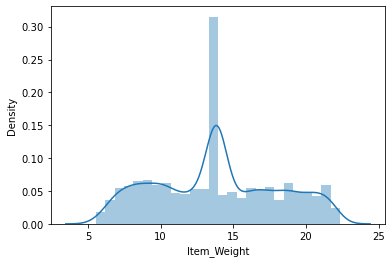

In [115]:
sns.distplot(training['Item_Weight'])

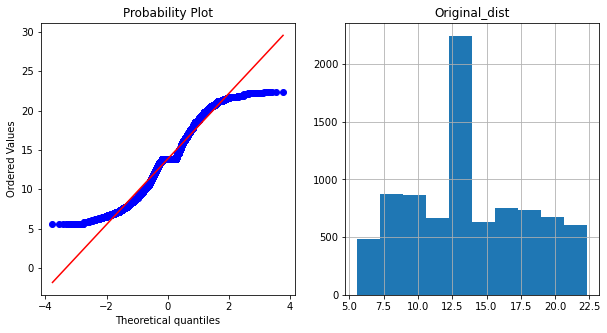

In [116]:
original_dist(training, 'Item_Weight')

In [117]:
training['Item_Weight'].skew()

0.09056145191767476

In [118]:
testing['Item_Weight'].describe()

count    5681.000000
mean       13.695633
std         4.245189
min         5.555000
25%        10.195000
50%        13.695633
75%        16.850000
max        22.350000
Name: Item_Weight, dtype: float64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

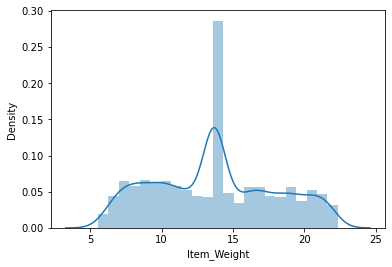

In [119]:
sns.distplot(testing['Item_Weight'])

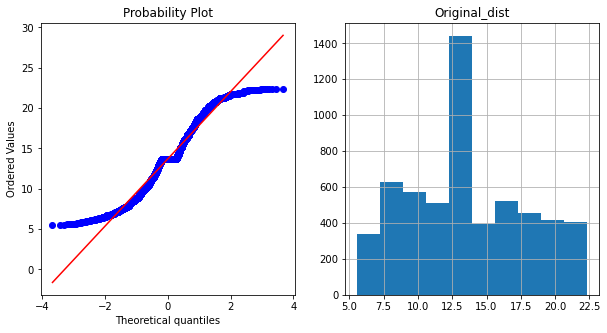

In [120]:
original_dist(testing,'Item_Weight')

In [121]:
testing['Item_Weight'].skew()

0.14281331679324252

All good with this column for training and testing 

## Column Item_Visibility

In [122]:
training['Item_Visibility'].describe()

count    8523.000000
mean        1.066132
std         0.051598
min         1.000000
25%         1.026989
50%         1.053931
75%         1.094585
max         1.328391
Name: Item_Visibility, dtype: float64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

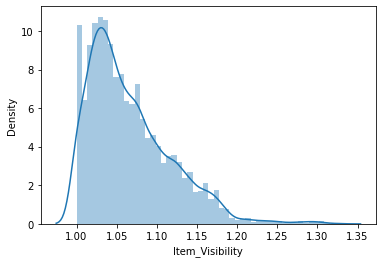

In [123]:
sns.distplot(training['Item_Visibility'])

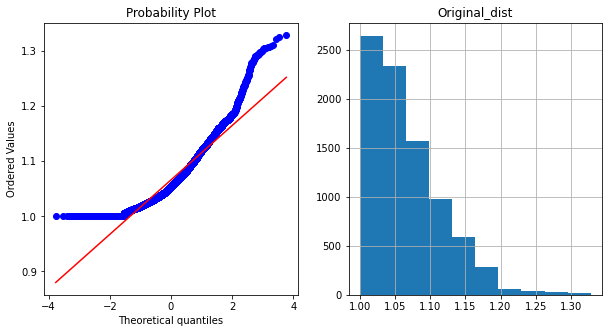

In [124]:
original_dist(training, 'Item_Visibility')

In [125]:
training['Item_Visibility'].skew()

1.1670905496918274

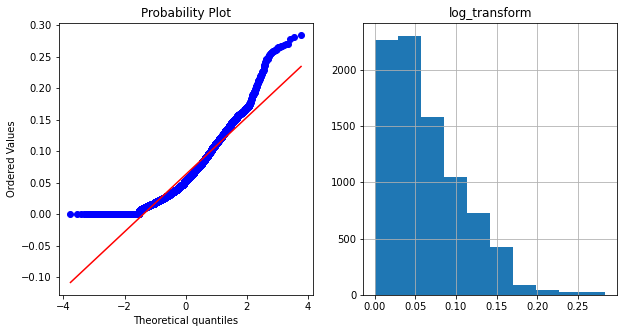

In [126]:
log_transform(training, 'Item_Visibility')

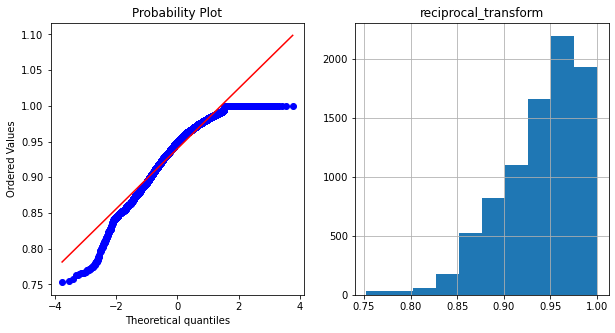

In [127]:
reciprocal_transform(training, 'Item_Visibility')

In [128]:
training['Item_Visibility'] = (1/training['Item_Visibility'])
training['Item_Visibility'].skew()

-0.8784682174218461

In [129]:
testing['Item_Visibility'].describe()

count    5681.000000
mean        1.065684
std         0.051252
min         1.000000
25%         1.027047
50%         1.054154
75%         1.093463
max         1.323637
Name: Item_Visibility, dtype: float64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

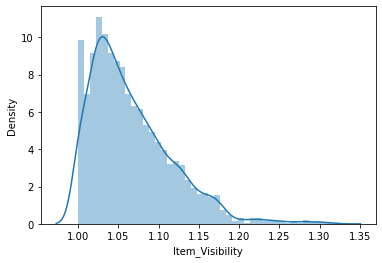

In [130]:
sns.distplot(testing['Item_Visibility'])

In [131]:
testing['Item_Visibility'].skew()

1.2383124276598967

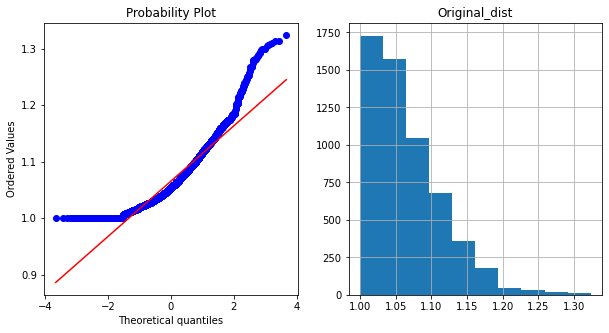

In [132]:
original_dist(testing, 'Item_Visibility')

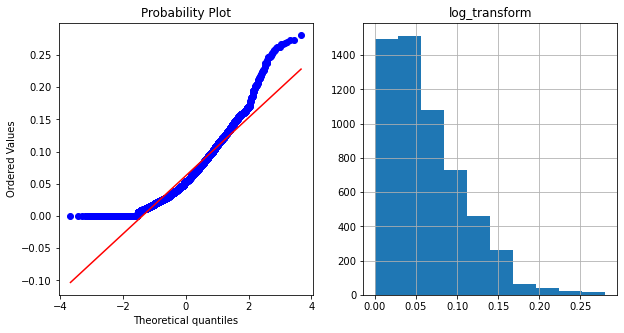

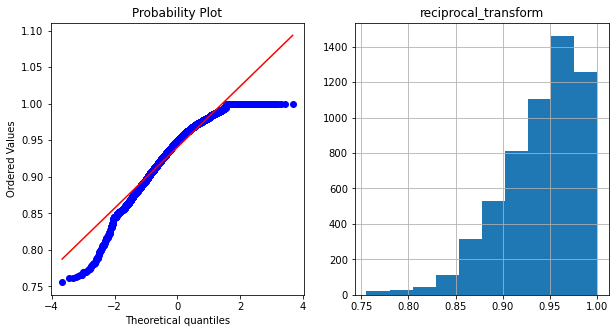

In [133]:
log_transform(testing, 'Item_Visibility')

reciprocal_transform(testing, 'Item_Visibility')

In [134]:
testing['Item_Visibility'] = (1/testing['Item_Visibility'])
testing['Item_Visibility'].skew()

-0.9276628899496111

## Column Item_MRP

In [135]:
testing['Item_MRP'].describe()

count    5681.000000
mean      142.023273
std        61.809091
min        32.990000
25%        95.412000
50%       142.415400
75%       187.026600
max       267.588400
Name: Item_MRP, dtype: float64

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

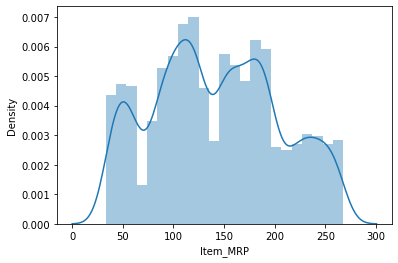

In [136]:
sns.distplot(testing['Item_MRP'])

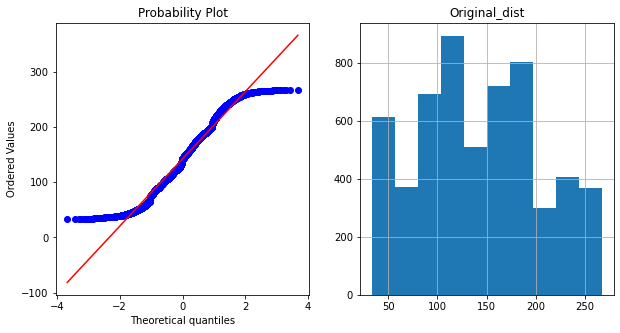

In [137]:
original_dist(testing, 'Item_MRP')

In [138]:
testing['Item_MRP'].skew()

0.136181538803708

In [139]:
training['Item_MRP'].describe()

count    8523.000000
mean      141.992782
std        62.275067
min        32.290000
25%        94.826500
50%       144.012800
75%       186.643700
max       267.888400
Name: Item_MRP, dtype: float64

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

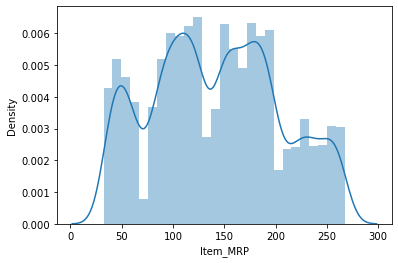

In [140]:
sns.distplot(training['Item_MRP'])

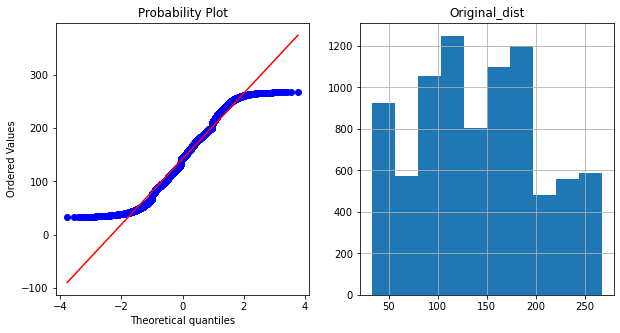

In [141]:
original_dist(training, 'Item_MRP')

In [142]:
training['Item_MRP'].skew()

0.1272022683110539

We have treated skewness for the continuous features. We can now move forward to with building model

In [143]:
x = training.drop('Item_Outlet_Sales',axis=1)
y = training['Item_Outlet_Sales']

# **Model Building with LabelEncoder**

In [144]:
training

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,10.300,2,0.984206,5,250.8092,7,4,2,1,2,3735.1380
1,9,6.920,3,0.981086,15,49.2692,2,6,2,3,3,443.4228
2,662,18.500,2,0.983516,11,142.6180,7,4,2,1,2,2097.2700
4,1295,9.930,2,1.000000,10,54.8614,1,2,1,3,2,994.7052
5,758,11.395,3,1.000000,1,52.4008,2,6,2,3,3,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,1192,9.420,2,0.933958,10,217.4192,3,2,3,1,2,3020.0688
8508,965,12.350,3,0.958547,7,200.4742,3,2,3,1,2,2587.9646
8509,373,9.100,2,0.823516,7,214.9902,1,1,3,2,1,424.7804
8514,132,16.000,3,0.948327,4,58.5904,3,2,3,1,2,468.7232


## Finding the best random state for the model

In [145]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [146]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Finding the best Random state for our model

In [147]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    accu = r2_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.5937328199294796 on random state 34


In [148]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=34)

In [149]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

mean_squared_error: 1478044.9449374324
mean_absolute_error: 889.0591214917548
0.5391130196257408


In [150]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

mean_squared_error: 2372037.705620547
mean_absolute_error: 1059.272180058651
0.2603463790313777


In [151]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

mean_squared_error: 1298619.7462821142
mean_absolute_error: 776.9554544844575
0.5950617499363755


In [152]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

mean_squared_error: 2579249.860515185
mean_absolute_error: 1153.9450350733139
0.19573306352068076


In [153]:
sv = SVR()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

mean_squared_error: 3317314.65650519
mean_absolute_error: 1339.2635055853223
-0.03441180203939642


In [154]:
ad = AdaBoostRegressor()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

mean_squared_error: 1534639.5497257207
mean_absolute_error: 969.891908469106
0.5214655748740165


In [155]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

mean_squared_error: 1210906.9594123587
mean_absolute_error: 747.5167910060942
0.6224125295043972


# Regularization.

In [156]:
from sklearn.linear_model import Ridge,Lasso

In [157]:
r = Ridge()
r.fit(x_train,y_train)
pred = r.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))

mean_squared_error: 1477969.7892195124
mean_absolute_error: 888.9691199947542
r2_score: 0.5391364548345339


In [158]:
l = Lasso()
l.fit(x_train,y_train)
pred = l.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))

mean_squared_error: 1478311.7996100087
mean_absolute_error: 888.8983449108194
r2_score: 0.5390298084590819


RandomForestRegressor and GradientBoostingRegressor has good performance.

## Crossvalidation

In [159]:
from sklearn.model_selection import cross_val_score

In [160]:
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest:", rfc.mean())

Cross validation score of Random Forest: 0.5439403107384007


In [161]:
gbr = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of Gradient Boosting:", gbr.mean())

Cross validation score of Gradient Boosting: 0.5875696092498057


## Hyperparameter Tuning

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
#Creating parameter list to pass in GridsearchCV

parameters = {'criterion':['friedman_mse','mse','mae'],
              'max_depth': np.arange(2,5)}

In [164]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': array([2, 3, 4])})

In [165]:
#Printing the best parameters.
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 2}

# Model

In [166]:
model = GradientBoostingRegressor(criterion= 'mse', max_depth= 2, random_state = 34)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(r2_score(y_test,pred)*100)

62.44314913566835


# **Model Building with get_dummies**


In [210]:
training_dummy1 = pd.get_dummies(training, columns = ['Item_Fat_Content','Item_Type', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],drop_first=True)

In [211]:
testing_dummy1 = pd.get_dummies(testing, columns = ['Item_Fat_Content','Item_Type', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],drop_first=True)

In [212]:
training_dummy1 = training_dummy1.drop('Item_Identifier', axis=1)

In [213]:
testing_dummy1 = testing_dummy1.drop('Item_Identifier', axis=1)

In [217]:
dummy_x1 = training_dummy1.drop('Item_Outlet_Sales', axis=1)
dummy_y1 = training_dummy1['Item_Outlet_Sales']

## Finding the best Random state for our model

In [218]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(dummy_x1,dummy_y1,test_size=0.20,random_state=i)
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    accu = r2_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.5998493327258406 on random state 34


In [219]:
x_train,x_test,y_train,y_test = train_test_split(dummy_x1,dummy_y1,test_size=0.20,random_state=34)

In [220]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

mean_squared_error: 1320993.9075504085
mean_absolute_error: 825.5567424398647
0.5880849934712414


In [221]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

mean_squared_error: 2412672.391518502
mean_absolute_error: 1072.749846451613
0.24767558864295836


In [222]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

mean_squared_error: 1289531.5330804018
mean_absolute_error: 778.2863242521994
0.5978956550580576


In [223]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

mean_squared_error: 1753700.6516030142
mean_absolute_error: 935.0882574545454
0.4531574966200378


In [224]:
sv = SVR()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

mean_squared_error: 2614801.09821313
mean_absolute_error: 1151.2121364266054
0.18464740428731607


In [225]:
ad = AdaBoostRegressor()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

mean_squared_error: 1620452.010399258
mean_absolute_error: 1010.9984063132835
0.4947073588848635


In [226]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

mean_squared_error: 1204735.0260541544
mean_absolute_error: 751.436676136632
0.6243370743149438


## Crossvalidation

In [227]:
gbr = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of Gradient Boosting:", gbr.mean())

Cross validation score of Gradient Boosting: 0.5877858306757918


In [228]:
lrr = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Gradient Boosting:", lrr.mean())

Cross validation score of Gradient Boosting: 0.47512118071531395


## Hyperparameter Tuning

In [229]:
#Creating parameter list to pass in GridsearchCV

parameters = {'criterion':['friedman_mse','mse','mae'],
              'max_depth': np.arange(2,5)}

In [230]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': array([2, 3, 4])})

In [231]:
#Printing the best parameters.
GCV.best_params_

{'criterion': 'mse', 'max_depth': 3}

# Model

In [232]:
model = GradientBoostingRegressor(criterion= 'mse', max_depth= 3, random_state = 34)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(r2_score(y_test,pred)*100)

62.4387473207781
